In [1]:
import chess.pgn
import pandas as pd
import chess
import numpy as np
from scipy import linalg

In [2]:
ls -shr

total 90M
 16K README.md                              572K chess.ipynb
 89M lichess_db_standard_rated_2013-01.pgn   52K chess-and-eigenvectors.ipynb


In [3]:
board = chess.Board()

In [4]:
pgn = open('lichess_db_standard_rated_2013-01.pgn',encoding="utf-8")

In [5]:
#creates a list with one entry for each space on the board
spaces = []
for i in range(1,9):
    for j in range (1,9):
        spaces.append(chr(j+96)+str(i))

In [6]:
#create a matrix to tally weights for every pair of opposing pieces
pieces_list = [space for space in spaces if any(map(space.__contains__, ['1','2','7','8']))]
weights = pd.DataFrame(0,index=pieces_list, columns=pieces_list)

In [7]:
#create a state dictionary of each square and the initial square of each piece
#Those 'None' entries are the empty squares in the middle of the board, before the first move
#Each piece is on it's own square to begin
state_dict = {space:(space  if any(map(space.__contains__, ['1','2','7','8'])) else None) for space  in spaces}
state_dict

{'a1': 'a1',
 'b1': 'b1',
 'c1': 'c1',
 'd1': 'd1',
 'e1': 'e1',
 'f1': 'f1',
 'g1': 'g1',
 'h1': 'h1',
 'a2': 'a2',
 'b2': 'b2',
 'c2': 'c2',
 'd2': 'd2',
 'e2': 'e2',
 'f2': 'f2',
 'g2': 'g2',
 'h2': 'h2',
 'a3': None,
 'b3': None,
 'c3': None,
 'd3': None,
 'e3': None,
 'f3': None,
 'g3': None,
 'h3': None,
 'a4': None,
 'b4': None,
 'c4': None,
 'd4': None,
 'e4': None,
 'f4': None,
 'g4': None,
 'h4': None,
 'a5': None,
 'b5': None,
 'c5': None,
 'd5': None,
 'e5': None,
 'f5': None,
 'g5': None,
 'h5': None,
 'a6': None,
 'b6': None,
 'c6': None,
 'd6': None,
 'e6': None,
 'f6': None,
 'g6': None,
 'h6': None,
 'a7': 'a7',
 'b7': 'b7',
 'c7': 'c7',
 'd7': 'd7',
 'e7': 'e7',
 'f7': 'f7',
 'g7': 'g7',
 'h7': 'h7',
 'a8': 'a8',
 'b8': 'b8',
 'c8': 'c8',
 'd8': 'd8',
 'e8': 'e8',
 'f8': 'f8',
 'g8': 'g8',
 'h8': 'h8'}

In [8]:
game_counter = 0
total_move_counter = 0
game = chess.pgn.read_game(pgn)

while game is not None:
    counter = 0
    state_dict = {space:(space  if any(map(space.__contains__, ['1','2','7','8'])) else None) for space  in spaces}

    #print(game)
    #do stuff here



    #for each line in the file
    for move in game.mainline_moves():
        counter += 1
        if board.is_pseudo_legal(move):


            if board.is_capture(move):
                capturing_piece = state_dict[chess.square_name(move.from_square)]
                captured_piece = state_dict[chess.square_name(move.to_square)]
                #print('capturing piece',capturing_piece)
                #print('captured piece',captured_piece)

                if board.is_en_passant(move):
                    #do en passant stuff here
                    #print("en passant")
                    pass
                elif capturing_piece is not None:
                    if captured_piece is not None:

                        #record the kill in a matrix of all kills
                        #print(counter,chess.square_name(move.from_square), "takes on",chess.square_name(move.to_square))
                        #print(counter,state_dict[chess.square_name(move.from_square)], "takes",state_dict[chess.square_name(move.to_square)])

                        #what piece is there now?
                     

                        #increment an entry in the weights matrix when one piece takes another
                        weights.loc[state_dict[chess.square_name(move.from_square)],state_dict[chess.square_name(move.to_square)]] += 1

                        #update the piece on the target square
                        state_dict[chess.square_name(move.to_square)] = state_dict[chess.square_name(move.from_square)]

                        #update the source square to be empty
                        state_dict[chess.square_name(move.from_square)] = None

                        #board.push(move)  # Make the move


                        #if df.loc[i+1,'move_no'] == 1:
                        #    state_dict = {space:(space  if any(map(space.__contains__, ['1','2','7','8'])) else None) for space  in spaces}

            else:


                #add castling special cases to record both moves
                if board.is_kingside_castling(move):
                    if board.turn:
                        #print(counter,'... and white castles kingside')
                        #move the appopriate rook
                        state_dict['f1'] = 'h1'
                        #leaving the rook source square empty
                        state_dict['h1'] = 'None'
                        #board.push(move)  # Make the move



                    elif not board.turn:
                        #print(counter,'... and black castles kingside')
                        #move the appopriate rook
                        state_dict['f8'] = 'h8'
                        #leaving the rook source square empty
                        state_dict['h8'] = 'None'
                        #board.push(move)  # Make the move

                elif board.is_queenside_castling(move):
                    if board.turn:
                        #print(counter,'... and white castles queenside')
                        #move the appopriate rook
                        state_dict['d1'] = 'a1'
                        #leaving the rook source square empty
                        state_dict['a1'] = 'None'
                        #board.push(move)  # Make the move

                    elif not board.turn:
                        #print(counter,'... and black castles queenside')
                        #move the appopriate rook
                        state_dict['d8'] = 'a8'
                        #leaving the rook source square empty
                        state_dict['a8'] = 'None'
                        #board.push(move)  # Make the move

                else:
                    #update the piece on the target square
                    state_dict[chess.square_name(move.to_square)] = state_dict[chess.square_name(move.from_square)]

                    #update the source square to be empty
                    state_dict[chess.square_name(move.from_square)] = None


                    #print(counter, chess.square_name(move.from_square),chess.square_name(move.to_square))

        board.push(move)  # Make the move
        #print(state_dict)
            
    if board.is_checkmate():
        checkers_list = [state_dict[chess.square_name(x)] for x in list(board.checkers())]
        if checkers_list[0] is not None:
            piece_giving_check = str(checkers_list[0])

            if board.turn:
                captured_king = 'e1'
            else:
                captured_king = 'e8'
            weights.loc[piece_giving_check,captured_king] += 1

    
    game_counter += 1
    #print('end of game',game_counter)
    
    total_move_counter += counter
    #print('total moves analyzed',total_move_counter)

    
    #print('board outcome',board.outcome())


    #print('is game over?',board.is_game_over())
    board.reset()

    game = chess.pgn.read_game(pgn)




    #print(state_dict)

    

KeyboardInterrupt: 

In [34]:
print(game_counter,'games analyzed')
print(total_move_counter,'moves analyzed')

26183 games analyzed
1737499 moves analyzed


In [35]:
weights

,a1,b1,c1,d1,e1,f1,g1,h1,a2,b2,...,g7,h7,a8,b8,c8,d8,e8,f8,g8,h8
a1,0,12,12,15,0,6,6,24,39,29,...,569,620,2741,839,1014,1060,487,925,710,2103
b1,10,0,9,2,1,7,8,13,15,13,...,343,272,833,1187,1467,988,71,2019,2813,609
c1,28,20,0,21,1,11,14,35,31,24,...,823,715,590,1946,1,914,63,4560,4301,1050
d1,28,10,17,0,1,9,12,22,26,17,...,1439,1419,1798,2752,3422,5838,2035,2412,2414,1801
e1,0,0,1,1,0,0,0,1,0,0,...,109,119,225,206,271,535,0,341,300,272
f1,18,7,8,15,1,0,11,22,15,15,...,390,582,907,3931,4555,730,75,0,2458,638
g1,21,11,14,10,1,6,0,22,12,13,...,715,522,500,3403,1780,924,60,1487,1193,894
h1,27,16,15,13,2,12,8,0,36,22,...,886,926,2148,870,1100,1220,518,1170,1031,2570
a2,10,2,3,2,1,3,2,2,0,14,...,27,34,70,357,189,124,89,144,67,46
b2,9,7,5,2,0,8,4,4,35,0,...,19,16,102,314,127,128,86,1525,503,41


In [36]:
#subtracting the identity matrix is necessary, forming an implicit set of homogeneous equations
a = weights - np.identity(32)
#print(a)

In [37]:
b = np.zeros(32)
#print(b)

In [38]:
x = linalg.solve(a, b)
x

array([ 0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,
       -0., -0., -0., -0., -0.,  0.])

### Why doesn't it work?
### Because the solver is finding the trivial solution. i.e. just a vector full of zeroes.
### To check that there is actually a non trivial solution, the determinant of A must be non-zero.

In [39]:
np.linalg.det(a)

-2.221669559297574e+96

### OK since the determinant is not zero, there must be at least one non-trivial solution. How to find it?
### An homogenous linear equation can be solved by finding the eigenvectors.

In [40]:
eigen_values, eigen_vectors = np.linalg.eig(a)  
eigen_vectors

array([[ 0.17732609+0.j,  0.17501965+0.j,  0.23412809+0.j, ...,
         0.15461261+0.j,  0.13447053+0.j, -0.13408396+0.j],
       [ 0.19399811+0.j,  0.19461203+0.j,  0.02733474+0.j, ...,
         0.01198716+0.j,  0.00904169+0.j, -0.01245965+0.j],
       [ 0.23998041+0.j,  0.23783968+0.j,  0.17812705+0.j, ...,
        -0.05420258+0.j, -0.00509494+0.j,  0.00547175+0.j],
       ...,
       [ 0.24145463+0.j, -0.24101994+0.j, -0.17678881+0.j, ...,
        -0.06718208+0.j, -0.10021601+0.j, -0.10761476+0.j],
       [ 0.19656266+0.j, -0.19639571+0.j,  0.00481366+0.j, ...,
         0.02812962+0.j,  0.06589383+0.j,  0.0686042 +0.j],
       [ 0.1803681 +0.j, -0.17782877+0.j, -0.24215192+0.j, ...,
        -0.0189169 +0.j,  0.17897915+0.j,  0.17279609+0.j]])

In [41]:
values = eigen_vectors[:, np.argmax(eigen_values)] 
values
#Notice that the entries of the eigenvector corresponding to the largest eigenvalue are all real valued,
#So it's OK to throw away the imaginary component

array([0.17732609+0.j, 0.19399811+0.j, 0.23998041+0.j, 0.46586756+0.j,
       0.04439653+0.j, 0.23687767+0.j, 0.20592942+0.j, 0.19229992+0.j,
       0.02869347+0.j, 0.05968326+0.j, 0.05983248+0.j, 0.07325578+0.j,
       0.0796744 +0.j, 0.05944166+0.j, 0.05265865+0.j, 0.03019653+0.j,
       0.02579487+0.j, 0.06460133+0.j, 0.06617224+0.j, 0.07502726+0.j,
       0.08266248+0.j, 0.06211247+0.j, 0.05234687+0.j, 0.03155183+0.j,
       0.18365151+0.j, 0.19752229+0.j, 0.22731368+0.j, 0.45327353+0.j,
       0.05758816+0.j, 0.24145463+0.j, 0.19656266+0.j, 0.1803681 +0.j])

In [42]:
## Let's normalize the values


In [43]:
list = []
for i in values:
    list.append(abs(float(i)))

<ipython-input-43-fd238d3eb4fa>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  list.append(abs(float(i)))


In [44]:
#The fractional inverse of the average of all the pawns
factor = 1 / np.mean(list[8:24])

In [45]:
normed = [i*factor for i in list]
#normed

In [46]:
normalized_list = ["%.2f"%i for i in normed]

['3.25', '3.50', '4.02', '8.03', '1.02', '4.27', '3.48', '3.19']
['0.46', '1.14', '1.17', '1.33', '1.46', '1.10', '0.93', '0.56']
['0.51', '1.06', '1.06', '1.30', '1.41', '1.05', '0.93', '0.53']
['3.14', '3.43', '4.25', '8.25', '0.79', '4.19', '3.65', '3.40']


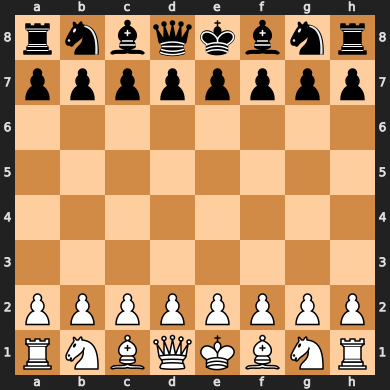

In [57]:
print(normalized_list[24:32])
print(normalized_list[16:24])
print(normalized_list[8:16])
print(normalized_list[0:8])
board

In [54]:
#tempo difference
white_sum = sum(normed[0:16])
black_sum = sum(normed[16:32])


print('total value of white pieces is', white_sum)
print('total value of black pieces is', black_sum)
print('total difference in value between white and black pieces is', white_sum-black_sum)
print('This is equal to the point value of the tempo advantage for white')

total value of white pieces is 38.952720802385414
total value of black pieces is 38.91539860730264
total difference in value between white and black pieces is 0.03732219508277268
This is equal to the point value of the tempo advantage for white


In [49]:
#Notice that, for each pair of opposing pawns, the black pawn is stronger in 7 out of 8 pairs
#Why should this be? Possibly because white has the initial tempo for attacking early in the game,
#giving the black pawns many opportunities for capturing pieces defensively, and practically necessitating it.

In [50]:
#find average strength of all the pieces taken by each piece
#eg, rook strength seems low in general, probably because they come out later in the game
#and have fewer opportunities to capture lots of pieces,
#but they probably capture, on average, stronger pieces, in proportion to their own strength 

In [51]:
#Try a Matrix Decomposition

In [52]:
U, D, V = np.linalg.svd(a, full_matrices=True)

In [53]:
D

array([1.60513887e+04, 1.56510714e+04, 5.73267418e+03, 5.66060082e+03,
       5.43436026e+03, 5.30773251e+03, 4.50833864e+03, 4.44370961e+03,
       3.60090550e+03, 3.50947840e+03, 3.25212511e+03, 2.92359295e+03,
       2.57131650e+03, 2.40017649e+03, 1.55826919e+03, 1.47188436e+03,
       1.33009762e+03, 1.28482357e+03, 8.15432524e+02, 7.98417812e+02,
       7.15467377e+02, 6.99287312e+02, 6.26925139e+02, 5.66506875e+02,
       5.16974141e+02, 3.29533478e+02, 2.68647775e+02, 2.30605534e+02,
       1.86981296e+02, 1.51525551e+02, 1.87372055e+01, 2.50327287e-01])